<a href="https://colab.research.google.com/github/Vikashbaabhu/Email-Spam-Detection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

In [ ]:
#1. Take the data and create dataframe
#2. Filtering the Data (Data Cleaning, Dropping)
#3. Data Visualisation
#4. Divide the data into input and output
#5. Train and Test variables
#6. Running Regressor
#7. Fit the model
#8. Predict the Output
#9. Evaluating the Accuracy Score

#1. Take the data and create dataframe

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#2. Filtering the Data

In [ ]:
col = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=col, inplace=True)

In [ ]:
names = {"v1":"Category","v2":"Message"}
df.rename(columns = names,inplace = True)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.nunique()

Category       2
Message     5169
dtype: int64

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [ ]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
df["Category"].value_counts()

1    4825
0     747
Name: Category, dtype: int64

#3. Data Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

fig = px.pie(df,names='Category')
fig.show()

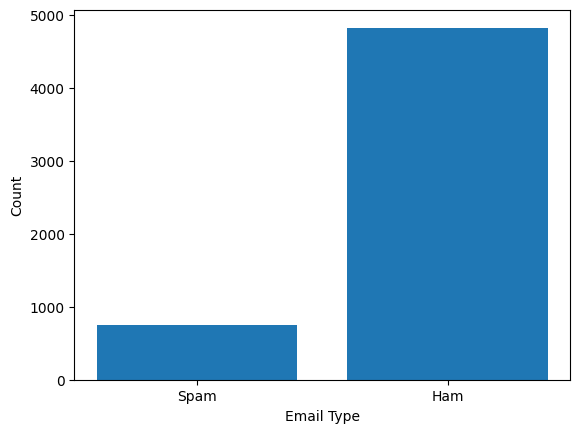

In [ ]:
spam = df[df['Category'] == 0].shape[0]
ham = df[df['Category'] == 1].shape[0]

plt.bar(['Spam', 'Ham'], [spam, ham])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

#4. Divide the data into input and output

In [ ]:
# Converting the object data type to integer data type

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = l.fit_transform(df[i])

In [ ]:
# Input

x = df.drop(["Category"], axis = 1)
x

,Message
0,1079
1,3101
2,1000
3,4088
4,2757
...,...
5567,3992
5568,4560
5569,3286
5570,3901


In [ ]:
#Output

y = df['Category']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

#5. Train and Test variables

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

In [ ]:

#After train_test_split ,

# Training varaibles get 80% data of x and y
# Testing variables get 20% data from x and y


In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572, 1)
(4457, 1)
(1115, 1)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


#6. Running Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 7. Fit the model

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

#8. Predict the Output

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# ACTUAL OUTPUT VALUES
y_test

3245    1
944     1
1044    0
2484    1
812     0
       ..
4264    1
2439    1
5556    1
4205    1
4293    0
Name: Category, Length: 1115, dtype: int64

#9. Evaluating the Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

86.54708520179372

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.87      1.00      0.93       965

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

